# PHP 2530: Bayesian Statistical Methods Homework II

In [1]:
import numpy as np #useful math functions and everything else
from numpy.random import rand #Uniform(0,1). just makes writing more succinct
import pandas as pd #Use this to create dataframes for nice manipulations
import matplotlib.pyplot as plt #for plotting our histograms and contours
import statsmodels.formula.api as smf #for linear regression in Problem 5
import statsmodels.api as sm
import matplotlib.gridspec as gridspec #Package to help with plotting
#lets us use probability distributions like t, beta, gamma,etc.
from scipy.stats import dirichlet, norm, gamma, poisson,t, beta, chi2, binom

C:\Users\nicka\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Problem 1 (BDA 3rd Ed. Exercise 3.2)
Comparison of two multinomial observations: on September 25, 1988, the evening of a pres-
idential campaign debate, ABC News conducted a survey of registered voters in the United
States; 639 persons were polled before the debate, and 639 different persons were polled after.
The results are displayed in the table below. Assume the surveys are independent simple random
samples from the population of registered voters. Model the data with two different multinomial
distributions. For j = 1, 2, let $\alpha_j$ be the proportion of voters who preferred Bush, out of those
who had a preference for either Bush or Dukakis at the time of survey j. Plot a histogram of the
posterior density for $\alpha_2$ - $\alpha_1$. What is the posterior probability that there was a shift toward
Bush?

NOTES:
 When using np.var from numpy package, set ddof = 1.
np.var = sum^n_j=1 (X_j - np.mean(X))^2 / (n-ddof).
ddof is automatically set to 0 so you need to set ddof=1. Likewise with np.std

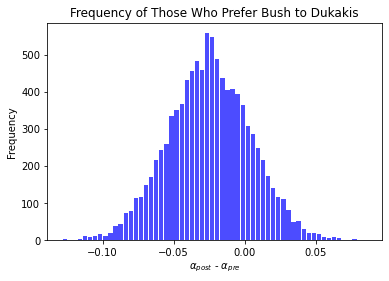

The posterior probability of a shift towards Bush is 19.5%


In [2]:
### PROBLEM 1 (BDA 3rd Ed., Exercise 3.2)

## METHOD 1: SAMPLE DIRECTLY FROM THE DIRICHLET'S, THEN MANUALLY CALCULATE

pre_theta = dirichlet.rvs([295, 308, 39], size=10000, random_state=1)
post_theta = dirichlet.rvs([289, 333, 20], size=10000, random_state=1)

#Distribution of those who preferred bush to Dukakis before the debate
pre_alpha = pre_theta[:,0] / (pre_theta[:,0] + pre_theta[:,1])
#Distribution of those who preferred bush to Dukakis after the debate
post_alpha =  post_theta[:,0] / (post_theta[:,0] + post_theta[:,1])

#Gives us density of those who prefer Bush to Dukakis
diff = post_alpha - pre_alpha

plt.hist(x = diff, bins='auto', color='blue', alpha=0.7, rwidth=0.85)
plt.ylabel('Frequency')
plt.xlabel(r'$\alpha_{post}$' + ' - ' + r'$\alpha_{pre}$')
plt.title('Frequency of Those Who Prefer Bush to Dukakis')
plt.show()

print(f"The posterior probability of a shift towards Bush is {100*np.mean(diff > 0)}%")

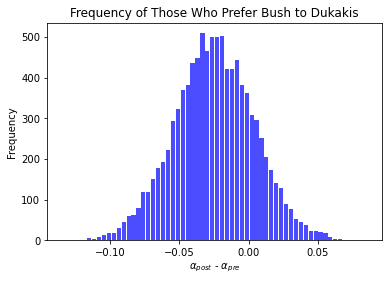

The posterior probability of a shift towards Bush is 19.56%


In [3]:
### METHOD 2: SAMPLE DIRECTLY FROM THE DISTRIBUTION OF ALPHA

#Distribution of those who preferred bush to Dukakis before the debate
pre_alpha = beta.rvs(a=295, b=308, size=10000)
#Distribution of those who preferred bush to Dukakis after the debate
post_alpha = beta.rvs(a=289, b=333, size=10000)

#Gives us density of those who prefer Bush to Dukakis
diff = post_alpha - pre_alpha

plt.hist(x = diff, bins='auto', color='blue', alpha=0.7, rwidth=0.85)
plt.rcParams['axes.facecolor']='none'
plt.grid(False)
plt.ylabel('Frequency')
plt.xlabel(r'$\alpha_{post}$' + ' - ' + r'$\alpha_{pre}$')
plt.title('Frequency of Those Who Prefer Bush to Dukakis')
plt.show()

print(f"The posterior probability of a shift towards Bush is {100*np.mean(diff > 0)}%")

### Problem 2 (BDA 3rd Ed., Exercise 3.3)
Estimation from two independent experiments: an experiment was performed on the effects
of magnetic fields on the flow of calcium out of chicken brains. Two groups of chickens were
involved: a control group of 32 chickens and an exposed group of 36 chickens. One measurement
was taken on each chicken, and the purpose of the experiment was to measure the average flow $\mu_c$
in untreated (control) chickens and the average flow $\mu_t$ in treated chickens. The 32 measurements
on the control group had a sample mean of 1.013 and a sample standard deviation of 0.24. The
36 measurements on the treatment group had a sample mean of 1.173 and a sample standard
deviation of 0.20.

>** (b) What is the posterior distribution for the difference, $\mu_t$ - $\mu_c$? To get this, you may sample
from the independent t distributions you obtained in part (a) above. Plot a histogram of your
samples and give an approximate 95% posterior interval for $\mu_t$ - $\mu_c$.**

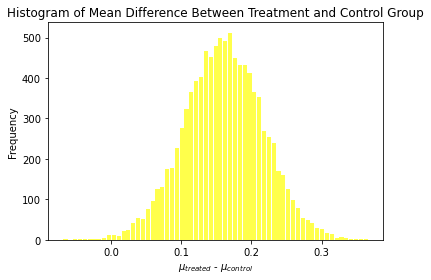

Our mean for the difference is 0.16
Our standard deviation for the difference is 0.056
Our credible interval for our difference in means  two groups is [0.05 0.27]


In [4]:
### PROBLEM 2 (BDA 3rd Ed. Exercise 3.3) 

#treatment group
#sample size, mean and standard deviation
n_t = 36; mean_t = 1.173; sd_t = 0.20 / np.sqrt(n_t)
#distribution of treatment group mean
mu_t = t.rvs(df = n_t-1, loc = mean_t, scale = sd_t, size = 10000)

#control group
#sample size, mean and standard deviation
n_c = 32; mean_c = 1.013; sd_c = 0.24 / np.sqrt(n_c)
#distribution of control group mean
mu_c = t.rvs(df = n_c-1, loc = mean_c, scale = sd_c, size = 10000)

# Our difference in means
mu = mu_t - mu_c

plt.hist(x = mu, bins='auto', color='yellow', alpha=0.7, rwidth=0.85)
plt.xlabel(r'$\mu_{treated}$' + ' - ' +  r'$\mu_{control}$')
plt.ylabel('Frequency')
plt.title('Histogram of Mean Difference Between Treatment and Control Group')
plt.show()

#mean and variance of our difference along with confidence interval bounds
print(f"Our mean for the difference is {np.round(mu.mean(),3)}")
print(f"Our standard deviation for the difference is {np.round(mu.std(ddof=1),3)}")
print(f"Our credible interval for our difference in means  two groups is "
      f"{np.round(np.percentile(mu,[2.5,97.5]),3)}")

### Problem 3 (BDA 3rd Ed. Exercise 3.5)

 Rounded data: it is a common problem for measurements to be observed in rounded
form (for a review, see Heitjan, 1989). For a simple example, suppose we weigh an
object five times and measure weights, rounded to the nearest pound, of 10, 10, 12, 11,
9. Assume the unrounded measurements are normally distributed with a noninformative
prior distribution on the mean $\mu$ and variance $\sigma^2$.

> (a) Give the posterior distribution for $(\mu, \sigma^2)$ obtained by pretending that the observations
are exact unrounded measurements.

In [5]:
### PROBLEM 3 (BDA 3rd Ed. Exercise 3.5)

#data
w = np.array([10,10,12,11,9])

#create grid for mu, log(sigma)
A=1000 #technically don't need this many, but Python works super fast
moo = np.linspace(start = 1, stop = 20, num = A)
lsig = np.linspace(start = -3, stop = 3, num = A)

#PART A : Assume unrounded measurements
def unrounded(a, b, x):
    '''
    Parameters:
        a - grid space for mean parameter
        b - grid space for standard deviation parameter
        x - data vector
    '''
    #sample size, mean and variance  for data vector
    n = len(x); v = x.mean(); s = x.var(ddof=1)
    b = np.exp(b)     # translate log(sigma) back to sigma;
    #using p(mu,log(sigma)|y), the prior on p(log(sigma)) propto 1
    loglik = -n*np.log(b) - ( ((n-1)*s + n*(v-a)**2) / (2*b*b) )
    lik = np.exp(loglik)
    return( lik / lik.sum() )

unrounded_post = unrounded(a = moo[None,:], b = lsig[:,None], x=w)

> (b) Give the correct posterior distribution for $(\mu, \sigma^2)$ treating the measurements as rounded.

In [6]:
#PART B: posterior without rounding

round_prior = lambda x,y: 1 

def rounded(x, a, b, prior):
    '''
    Parameters:
        a - grid space for mean parameter
        b - grid space for log standard deviation parameter
        x - data vector
        prior - prior for mu, log sigma
    '''
    
    #log of the prior
    logprior = np.log(prior(a,b))
    b = np.exp(b) #swith log sigma back to sigma
    e = 1e-200 #python not good with really small values, so add this correction
    def loglik(a,b,x):
        upper = norm.cdf((x + 0.5),loc=a,scale=b)
        lower = norm.cdf((x - 0.5),loc=a,scale=b) #lower part of likelihood
        return np.log(upper - lower+e)
    logpost = logprior + sum(loglik(a,b,x[j]) for j in range(len(x)))
    return logpost

'''
NOTE: w[:,None,None] creates 3 dimensions. First dimension corresponds to
the entries of w. Last two are matrices the size of our grid.
'''

'''
NOTE: This matrix is built similarly to a plot. mu corresponds to the x axis (col)
log sigma corresponds to the y axis (rows). 
'''

rounded_post = rounded(x=w, a = moo[:,None], b = lsig[:,None,None],
                       prior = round_prior)

rounded_post = np.exp(rounded_post.sum(axis=2)) #go from log post to post
rounded_post = rounded_post / rounded_post.sum() #normalize the density

> (c) How do the incorrect and correct posterior distributions differ? Compare means, variances,
and contour plots.

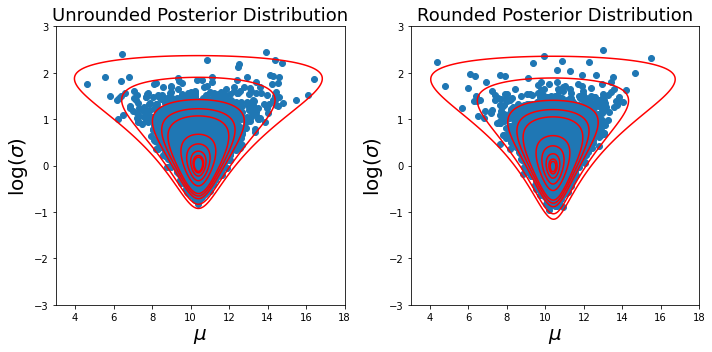

In [7]:
## PART C: COMPARING MEANS, VARIANCES AND CONTOUR PLOTS
        
#FIRST, SAMPLE FROM DISTRIBUTIONS:

#simulated points from marginal posteriors (unrounded)
B = 10000
#sample size, sample mean, sample variance
r = len(w); mu_w = w.mean(); var_w = w.var(ddof=1)

#marginal posterior pdf's for mu and sigma.
sig_unrounded = np.sqrt( ((r-1)*var_w) / (chi2.rvs(df = r - 1, size = B)) )
mu_unrounded = norm.rvs(loc = mu_w, scale = sig_unrounded/np.sqrt(r), size = B)

#np.repeat repeats the vector; np.tile repeats the entries
mu_grid =  np.tile(moo,len(lsig))
lsig_grid = np.repeat(lsig,len(moo))

samples = np.random.choice(rounded_post.size,size=B,p=rounded_post.ravel())

#need to add random jitter (see pg 76 of BDA book, 3rd Ed.)

#step sizes for our grids
d_moo = np.diff(moo)[0]/2
d_lsig = np.diff(lsig)[0]/2

mu_rounded = mu_grid[samples] -d_moo + (d_moo)*rand(B)
sig_rounded = np.exp( lsig_grid[samples] -d_lsig + (d_lsig)*rand(B))

#LASTLY, WE PLOT THE CONTOURS

'''
NOTE: Contours in python go by the values in the matrix, not the quantiles.
Therefore we use a certain scheme to plot the contour lines. We take a grid for
values between the min and max of the posterior, then find the values 
corresponding to the quantiles we want.
'''
#contour levels
lev = [0.0001, 0.001, 0.01,.025,0.05,0.25,0.50,0.75,0.90,0.95]
cont = np.quantile(np.linspace(rounded_post.min(),rounded_post.max(),10000),lev)

fig, (ax1,ax2) = plt.subplots(1, 2,figsize=(10,5))

#unrounded contour
ax1.contour(moo,lsig,unrounded_post,levels=cont,colors='red')
ax1.scatter(mu_unrounded, np.log(sig_unrounded), zorder = 1)
ax1.set_ylabel("log(" + r'$\sigma$' +")", fontsize = 20)
ax1.set_ylim(-3,3)
ax1.set_xlabel( r'$\mu$', fontsize = 20)
ax1.set_xlim(3,18)
ax1.set_title('Unrounded Posterior Distribution', fontsize = 18)
#plt.show()

#rounded contour
ax2.contour(moo, lsig, rounded_post,levels=cont,colors='red')
ax2.scatter(mu_rounded, np.log(sig_rounded), zorder = 1)
ax2.set_ylabel("log(" + r'$\sigma$' +")", fontsize = 20)
ax2.set_ylim(-3,3)
ax2.set_xlabel( r'$\mu$', fontsize = 20)
ax2.set_xlim(3,18)
ax2.set_title('Rounded Posterior Distribution', fontsize = 18)
#plt.show()
fig.tight_layout()

In [8]:
### All of this sets up the dataframe so we can look at summary statistics
df_stats  = {
        'Unrounded mu': mu_unrounded,
        'Unrounded sigma': sig_unrounded,
        'Rounded mu':mu_rounded,
        'Rounded sigma': sig_rounded
                   } 
df_stats = pd.DataFrame(df_stats)

df_stats  = {
        'Mean': df_stats.mean(axis=0),
        'Variance': df_stats.var(axis=0,ddof=1),
        '2.5%': df_stats.quantile(0.025,axis=0),
        '50%': df_stats.quantile(0.50,axis=0),
        '97.5%': df_stats.quantile(0.975,axis=0)
                   } 
df_stats = np.round(pd.DataFrame(df_stats),4)

#so we can see all the data
pd.set_option("display.max_columns", 6)
print(df_stats)

                    Mean  Variance    2.5%      50%    97.5%
Unrounded mu     10.4080    0.5490  8.9786  10.4125  11.8416
Unrounded sigma   1.4408    0.5539  0.6849   1.2511   3.3857
Rounded mu       10.3918    0.4890  9.0202  10.3898  11.8137
Rounded sigma     1.3608    0.5218  0.6120   1.1782   3.1949


> (d) Let $z = (z_1,\dots,z_5)$ be the original, unrounded measurements corresponding to the five
observations above. Draw simulations from the posterior distribution of z. Compute
the posterior mean of $(z_1 - z_2)^2$.

In [9]:
# PART D

'''
NOTE: The Inverse cdf method for the normal distribution works as follows:
1). Let F be the normal cdf. F:[a,b] -> [F(a),F(b)], so F^-1:[F(a),F(b)] -> [a,b]. 
2). Note [F(a),F(b)]= F(a) + (F(b)-F(a))*[0,1] so F^-1(F(a) + (F(b)-F(a))*[0,1]) 
    maps those values to [a,b].
'''
#This calculates the cdfs.
up = norm.cdf(w + 0.5, loc = mu_rounded[:,None], scale = sig_rounded[:,None])
down = norm.cdf(w - 0.5, loc = mu_rounded[:,None], scale = sig_rounded[:,None])

#this is equivalent to part 2 in the above notes
invcdf_samps = down + (up-down)*rand( B*len(w) ).reshape(B,len(w))
Z = norm.ppf(invcdf_samps,loc = mu_rounded[:,None], scale = sig_rounded[:,None])

print(f"Our Posterior mean is {np.round(((Z[:,1]-Z[:,0])**2).mean(),3)}")

Our Posterior mean is 0.164


### Problem 4 (BDA 3rd Ed., Exercise 3.8)
Analysis of proportions: a survey was done of bicycle and other vehicular traffic in the neigh-
borhood of the campus of the University of California, Berkeley, in the spring of 1993. Sixty
city blocks were selected at random; each block was observed for one hour, and the numbers of
bicycles and other vehicles traveling along that block were recorded. The sampling was strat-
ified into six types of city blocks: busy, fairly busy, and residential streets, with and without
bike routes, with ten blocks measured in each stratum. The table below displays the number of
bicycles and other vehicles recorded in the study. For this problem, restrict your attention to
the first four rows of the table: the data on residential streets.


In [10]:
#Problem 4 (BDA 3rd Ed., Exercise 3.8)

#Data for this problem
#y-bikes for streets w/ bike lanes;v- vehicles for streets w/ bike lanes
y = np.array([16, 9, 10, 13,19, 20, 18, 17,35, 55])
v = np.array([58,90, 48, 57, 103, 57, 86,112, 273, 64])
n_y = v + y

#z-bikes for streets w/o bike lanes;v- vehicles for streets w/o bike lanes
z = np.array([12, 1, 2, 4, 9, 7, 9, 8])
w = np.array([113, 18, 14, 44,208, 67, 29, 154])
n_z = w+z

## METHOD 1: Beta Distribution

The first approach involves recognizing that the proportions lie strictly between 0 and 1. Therefore a natural way to model the data is to use a beta distribution. 

### Likelihood
\begin{alignat*}{1}
y_j|\alpha_y,\beta_y &\sim Beta(\alpha_y,\beta_y) & \text{ for } j= 1,2,\dots,10\\
z_k |\alpha_z,\beta_z &\sim Beta(\alpha_z,\beta_z) & \text{ for } k= 1,2,\dots,8\\
\end{alignat*}

### Priors
\begin{alignat*}{1}
p(\alpha_y,\beta_y) &\propto I_{\alpha_y \in [\epsilon,100], \beta_y \in [\epsilon,100]} \\
p(\alpha_z,\beta_z) &\propto I_{\alpha_z \in [\epsilon,100], \beta_z \in [\epsilon,100]} \\
\end{alignat*}

$\epsilon$ = 0.001

The Difference in proportions is 0.1


Text(0, 0.5, 'Frequency')

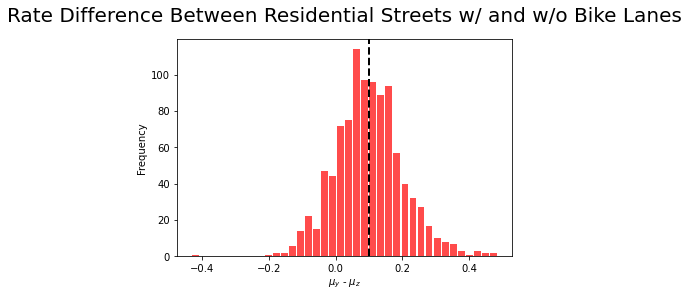

In [15]:
#Beta Likelihood Approach
alphas = np.linspace(start=0.001,stop=100,num=1000)
betas = np.linspace(start=0.001,stop=100,num=1000)

#posteriors

post_y = np.prod(beta.pdf(x = (y/n_y),
                          a = alphas[:,None], b = betas[:,None,None]),axis=2)
post_y = post_y / post_y.sum()
post_z = np.prod(beta.pdf(x = (z/n_z),
                          a = alphas[:,None], b = betas[:,None,None]),axis=2)
post_z = post_z / post_z.sum()

#Posterior draws

samples_y = np.random.choice(post_y.size,size=1000,p=post_y.ravel())
samples_z = np.random.choice(post_z.size,size=1000,p=post_z.ravel())

#should add random jitter,but I don't want to
alpha_y_post = np.tile(alphas,len(betas))[samples_y]
beta_y_post = np.repeat(betas,len(alphas))[samples_y]

alpha_z_post = np.tile(alphas,len(betas))[samples_z]
beta_z_post = np.repeat(betas,len(alphas))[samples_z]

#Posterior predictive draws of proportional difference

prop_diff1 = ( beta.rvs(size=1000,a=alpha_y_post,b = beta_y_post) -
              beta.rvs(size=1000,a=alpha_z_post,b = beta_z_post))

print(f"The Difference in proportions is {np.round(prop_diff1.mean(),3)}")

plt.hist(x = prop_diff1, bins='auto', color='red', alpha=0.7, rwidth=0.85)
plt.axvline(prop_diff1.mean(), color='k', linestyle='dashed', linewidth=2)
plt.title('Rate Difference Between Residential Streets w/ and w/o Bike Lanes'
             , y = 1.05,fontsize=20)
plt.xlabel(r'$\mu_{y}$' + ' - ' +  r'$\mu_{z}$')
plt.ylabel('Frequency')

## METHOD 2: Binomial Distribution

The second approach involves looking at the number of bicycles and the total number of observed traffic rather than the proportion. Define $y_j = \frac{b^{y}_j}{b^{y}_j + v^{y}_j}$ where $b^{y}_j$ is the number of bicycles on street j, and $v^{y}_j$ the number of non-bicycle vehicles. Call $n^y_j = b^{y}_j + v^{y}_j$ to be the total number of vehicles seen on street j. It is similarly defined for z.

The reason we do this is that working with the number of bicycles rather than the proportion allows us much more leeway. There are more probability distributions that deal with count data. For this approach we make the assumption that the total number of vehicles seen is fixed, but the number of bicycles is not. We can then model $b^y_j \mid \theta_y \sim Bin(n^y_j, \theta_y)$.

### Likelihood
\begin{alignat*}{1}
b^y_j \mid \theta_y \sim Bin(n^y_j, \theta_y) & \text{ for } j= 1,2,\dots,10\\
b^z_k \mid \theta_z \sim Bin(m^z_k, \theta_z) & \text{ for } k= 1,2,\dots,8\\
\end{alignat*}

### Priors
\begin{alignat*}{1}
\theta_y &\sim Beta(5,5) \\
\theta_z &\sim Beta(5,5) \\
\end{alignat*}

The Difference in proportions is 0.104


Text(0, 0.5, 'Frequency')

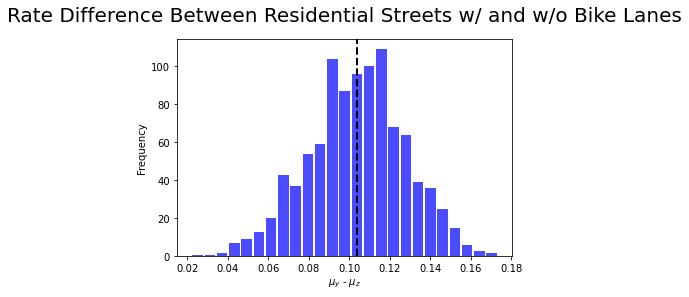

In [16]:
#Method 2: FOCUS ON NUMBER OF BIKES INSTEAD OF PROPORTIONS  

#parameters for the beta priors
a2 = 5; b2 = 5
#Posterior distribution for y
theta_y = beta.rvs(a=a2+y.sum(), b=b2+n_y.sum()-y.sum(), size=1000)
#Posterior distribution for z
theta_z = beta.rvs(a=a2+z.sum(), b=b2+n_z.sum()-z.sum(), size=1000)

#Posterior Predictive samples (y tilde | y) for our two models

#posterior predictive draws. Sum up all traffic
y_bikes = binom.rvs(n = n_y[None,:], p = theta_y[:,None]) 
z_bikes = binom.rvs(n = n_z[None,:], p = theta_z[:,None]) 

#proportions of vehicles
y_prop = y_bikes / n_y[np.newaxis,:]
z_prop = z_bikes / n_z[np.newaxis,:]

'''
Note: Take the row means. This is equivalent to taking the mean of each column
and provides us with the mean proportion of bikes on residential streets w/ or 
w/o bike lanes.
'''
prop_diff2 = y_prop.mean(axis=1) - z_prop.mean(axis=1)

print(f"The Difference in proportions is {np.round(prop_diff2.mean(),3)}")

plt.hist(x = prop_diff2, bins='auto', color='blue', alpha=0.7, rwidth=0.85)
plt.axvline(prop_diff2.mean(), color='k', linestyle='dashed', linewidth=2)
plt.title('Rate Difference Between Residential Streets w/ and w/o Bike Lanes'
             , y = 1.05,fontsize=20)
plt.xlabel(r'$\mu_{y}$' + ' - ' +  r'$\mu_{z}$')
plt.ylabel('Frequency')

## METHOD 3: Poisson Distribution

The third approach is similar in the setup of the second approach, except now we model both $b^{y}_j$ and  $v^{y}_j$. We no longer assume that we observe a fixed amount of vehicles in total, but rather we count the number of bicycles and non-bicycles that we see. In this regard the Poisson distribution becomes a natural formulation for the resulting models described below. The model for residential streets with bike lanes is:

\begin{alignat*}{1}
 b^{y}_j |\theta^{b}_y &\sim Poisson(\theta^{b}_y) & \text{ if } j= 1,2,\dots,10\\
v^{y}_j |\theta^{v}_y &\sim Poisson(\theta^{v}_y) & \text{ if } j= 1,2,\dots,10\\
\end{alignat*}

The model for residential streets without bike lanes is
\begin{alignat*}{1}
 b^{z}_j  |\theta^{b}_z &\sim Poisson(\theta_z) & \text{ if } k= 1,2,\dots,8\\
v^{z}_j |\theta^{v}_z &\sim Poisson(\theta^{v}_z) & \text{ if } k= 1,2,\dots,8\\
\end{alignat*}


 For this problem we introduce four new parameters to estimate, $\theta^{b}_y$, $\theta^{v}_y$, $\theta^{b}_z$ and $\theta^{v}_z$. These parameters are simply the rates in which those vehicles occur on the streets, and we can then estimate $\theta_y$ and $\theta_z$ as:

\begin{alignat*}{1}
\theta_y &= \frac{\theta^{b}_y}{\theta^{b}_y + \theta^{v}_y}\\
\theta_z &= \frac{\theta^{b}_z}{\theta^{b}_z + \theta^{v}_z}\\
\end{alignat*}

Of course though, for what I will do throughout this problem, you will see the calculation of $\theta_y$ and $\theta_z$ is unnecessary.

### Priors

\begin{alignat*}{1}
\theta^b_y &\sim Gamma(15,1) \\
\theta^v_y &\sim Gamma(85,1) \\
\theta^b_z &\sim Gamma(15,1) \\
\theta^v_z &\sim Gamma(85,1) \\
\end{alignat*}

The Difference in proportions is 0.099


Text(0, 0.5, 'Frequency')

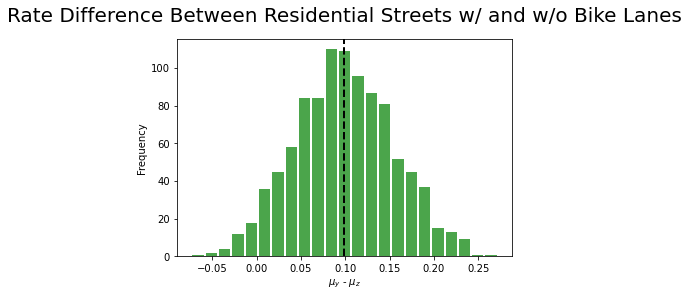

In [17]:
#Poisson Likelihood Method: Separate Bikes and Vehicles

#Parameters for our gamma priors (y- bicycles, vehichles. z - bicyles, vehicles)
a_b = 15; a_v = 85;b = 1

#Posterior distributions for y, v based off choice of prior
theta_by = gamma.rvs(a=a_b+y.sum(), scale=1/(b+len(y)), size=1000)
theta_vy = gamma.rvs(a=a_v+v.sum(), scale=1/(b+len(v)), size=1000)

#Posterior distributions for z,w based off choice of prior
theta_bz = gamma.rvs(a=a_b+z.sum(), scale=1/(b+len(z)), size=1000)
theta_vz = gamma.rvs(a=a_v+w.sum(), scale=1/(b+len(w)), size=1000)

#sum of the rates
yrate = poisson.rvs(size=1000,mu = theta_by)+poisson.rvs(size=1000,mu = theta_vy)
zrate = poisson.rvs(size=1000,mu = theta_bz)+poisson.rvs(size=1000,mu = theta_vz)

#this is the proportion of bikes that we see
y_bikes = poisson.rvs(size=1000,mu = theta_by) / yrate
z_bikes = poisson.rvs(size=1000,mu = theta_bz) / zrate

#Taking difference of proportions between street w/ bike lane vs without
prop_diff3 = y_bikes - z_bikes

print(f"The Difference in proportions is {np.round(prop_diff3.mean(),3)}")

#Part d: Histograms

plt.hist(x = prop_diff3, bins='auto', color='green', alpha=0.7, rwidth=0.85)
plt.axvline(prop_diff3.mean(), color='k', linestyle='dashed', linewidth=2)
plt.title('Rate Difference Between Residential Streets w/ and w/o Bike Lanes'
             , y = 1.05,fontsize=20)
plt.xlabel(r'$\mu_{y}$' + ' - ' +  r'$\mu_{z}$')
plt.ylabel('Frequency')

### Problem 5 (BDA 3rd Ed., Exercise 3.12)
Poisson regression model: expand the model of Exercise 2.13(a) by assuming that the
number of fatal accidents in year t follows a Poisson distribution with mean $\alpha + \beta t$. You
will estimate $\alpha$ and $\beta$, following the example of the analysis in Section 3.7. The table is provided below for reference

> (b) Discuss what would be a realistic informative prior distribution for $(\alpha, \beta)$. Sketch its
contours and then put it aside. Do parts (c)–(h) of this problem using your noninformative prior distribution from (a).

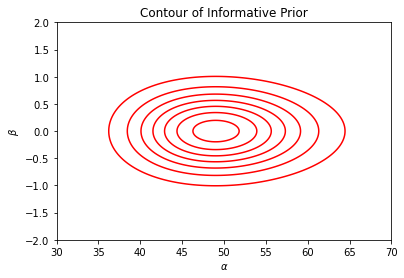

In [19]:
### Problem 5 (BDA 3rd Ed, Exercise 3.12)
#number of fatal accidents between 1976-1985

### STORES OUR INFORMATION
df  = {
       'Accidents':np.array([24, 25, 31, 31, 22, 21, 26, 20, 16, 22]),
       'Deaths': np.array([734, 516, 754, 877, 814, 362, 764, 809, 223, 1066]),
       'Year': np.arange(1,11),
       'Death Rate':  np.array([0.19, 0.12, 0.15, 0.16, 
                                0.14, 0.06, 0.13, 0.13, 0.03, 0.15])
                   } 
df = pd.DataFrame(df)

#PART B: INFORMATIVE PRIOR
# number of draws
W = 1000
#grid for alpha and beta
alpha = np.linspace(start = 10, stop = 70, num = W)
betas =  np.linspace(start= -5, stop = 5, num = W)

#a = alpha, b = beta
inf_prior = lambda x,y : gamma.pdf(x=x,a=50,scale=1)*norm.pdf(x=y,loc = 0,scale = 0.5)
prior = inf_prior(x = alpha[None,:],y = betas[:,None])
plt.contour(alpha, betas, prior, colors='red')
plt.ylabel(r'$\beta$')
plt.ylim (-2,2)
plt.xlabel(r'$\alpha$')
plt.xlim(30,70)
plt.title('Contour of Informative Prior')
plt.show()

> (c) Write the posterior density for $(\alpha, \beta)$. What are the sufficient statistics?

> (d) Check that the posterior density is proper.

> (e) Calculate crude estimates and uncertainties for $(\alpha, \beta)$ using linear regression.

In [20]:
#Part e, Linear Regression

#This is what the problem wants us to do. A linear regression
fit = smf.ols(formula='Accidents ~ Year', data=df).fit()
print(fit.params)
print(fit.cov_params())

Intercept    28.866667
Year         -0.921212
dtype: float64
           Intercept      Year
Intercept   7.559293 -1.079899
Year       -1.079899  0.196345


In [21]:
'''NOTE:This is what we're essentially doing with our bayesian analysis
 since our prior is flat. A poisson reg. under the identity link'''
 
fit_canon = smf.glm(formula='Accidents ~ Year', data=df,
              family=sm.families.Poisson(link = sm.families.links.identity()) ).fit()
print(fit_canon.params)
print(fit_canon.cov_params())

Intercept    29.021307
Year         -0.949329
dtype: float64
           Intercept     Year
Intercept   12.06122 -1.66529
Year        -1.66529  0.28552


C:\Users\nicka\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:273: DomainWarning: The identity link function does not respect the domain of the Poisson family.
  DomainWarning)


> (f) Plot the contours and take 1000 draws from the joint posterior density of $(\alpha, \beta)$.

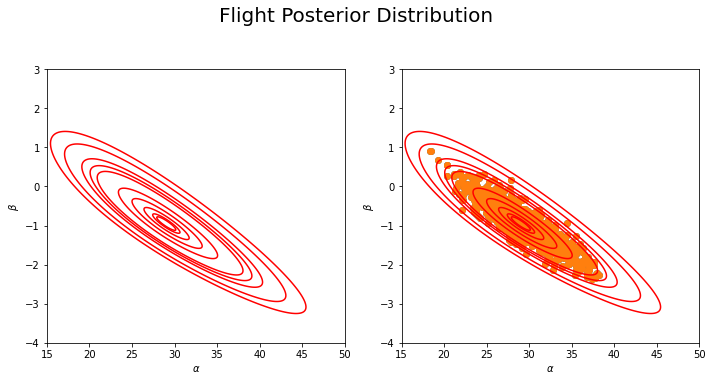

In [24]:
# PART F
ind_prior = lambda x,y: 1
#a = alpha, b = beta, t = time vector, y= #number of fatal accidents
def flight_post(a,b,t,y,prior):
    '''
    Parameters:
        a - grid space for alpha
        b - grid space for beta
        t - time data
        y - number of fatal accidents
        prior - prior density for alpha and beta
    Returns:
        logpost : natural log of the unnormalized posterior
    '''
    #Uniform Prior 1_{alpha+beta*t>0}
    logprior = np.log(prior(a,b))
    
    #log posterior
    def loglik(x,y):
        logl = np.piecewise( x,[x > 0, x <=0 ],
                            [lambda x: y*np.log(x) - x, lambda x: -np.inf])
        return logl
    #exponentiate to get unnormalized posterior density. Divide by sum to "norm"
    logpost = logprior + sum([loglik(a+b*t[j],y[j]) for j in range(len(y))])
    return logpost

flights = flight_post(a=alpha[:,None],b=betas[:,None,None],
            t=np.asarray(df['Year']),y=np.asarray(df['Accidents']),
            prior = ind_prior)

flights = np.exp( flights.sum(axis=2) )
flights = flights / flights.sum()

alpha_post = np.repeat(alpha,len(betas))
beta_post = np.tile(betas,len(alpha))

Fl = 1000 #Number of samples to draw
samples = np.random.choice(flights.size, size=Fl, p = flights.ravel(order="F"))

#add some random jitter so the variables are continous random variables
d_alpha = np.diff(alpha)[0]/2
d_beta = np.diff(betas)[0]/2

alpha_post = alpha_post[samples] -d_alpha + (d_alpha)*rand(Fl)
beta_post = beta_post[samples] -d_beta + (d_beta)*rand(Fl)

fig, (ax1,ax2) = plt.subplots(1, 2,figsize=(10,5))

ax = [ax1,ax2]

#contour levels for flight posterior
lev = [0.0001, 0.001, 0.01,.025,0.05,0.25,0.50,0.75,0.90,0.95]
flight_cont = np.quantile(np.linspace(flights.min(),flights.max(),10000),lev)

for j in range(2):
    ax[j].contour(alpha, betas, flights,levels=flight_cont,colors='red')
    ax2.scatter(alpha_post,beta_post,zorder=1)
    ax[j].set_ylim(-4,3)
    ax[j].set_ylabel(r'$\beta$')
    ax[j].set_xlim(15,50)
    ax[j].set_xlabel(r'$\alpha$')
fig.suptitle('Flight Posterior Distribution', y = 1.05,fontsize=20)
fig.tight_layout()

> (g) Using your samples of $(\alpha, \beta)$, plot a histogram of the posterior density for the expected
number of fatal accidents in 1986, $\alpha + 1986\beta$.

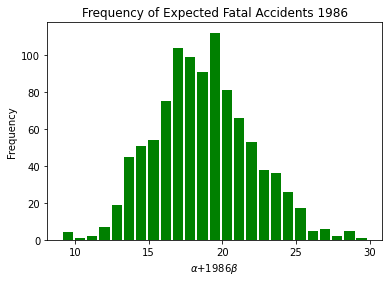

In [12]:
#PART G

#Now we plot our histogram
plt.hist(x = alpha_post + beta_post*11, bins='auto', color='green',rwidth=0.85)
plt.xlabel(r'$\alpha$'+'+' +'1986'+ r'$\beta$')
plt.ylabel('Frequency')
plt.title('Frequency of Expected Fatal Accidents 1986')
plt.show()


> (h) Create simulation draws and obtain a 95\% predictive interval for the number of fatal
accidents in 1986.

In [13]:
#PART H

#95% confidence interval
pos = poisson.rvs(alpha_post + beta_post*11, size = Fl)
print("Our 95% predictive interval for the expected number "
      f"of accidental crashes in 1986 is {np.quantile(pos, [0.025, 0.975])}")

Our 95% predictive interval for the expected number of accidental crashes in 1986 is [10. 31.]
